In [1]:
#link to tutorial: https://docs.pytorch.org/tutorials/beginner/basics/data_tutorial.html

In [2]:
#pytorch provides two data primitives torch.utils.data.DataLoader
# and torch.utils.data.Dataset that allow you to use pre-loaded datasets
# as well as your own. Dataset stores the samples and their corresponding
# labels and DataLoader wraps an iterable around the Dataset to enable
# easy access to the samples. 

In [3]:
# loading a dataset
# here is an example on how to load the Fashion-MNIST dataset from
# torch vision. Fashion-MNIST is a dataset of Zalando's article images
# consisting of 60,000 training examples and 10,000 test examples.
# each example comprises a 28 x 28 grayscale image and an associated 
# label from one of 10 classes

In [4]:
# the fashionMNIST datast is loaded with the following parameters:
# root is the path where the train/test data is stored
# train specifies training or test dataset
#download=True downloads the data from the internet if its not
# available at root
# transform and target_transform specify the feature and label 
# transformations.


In [6]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt 

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()

)

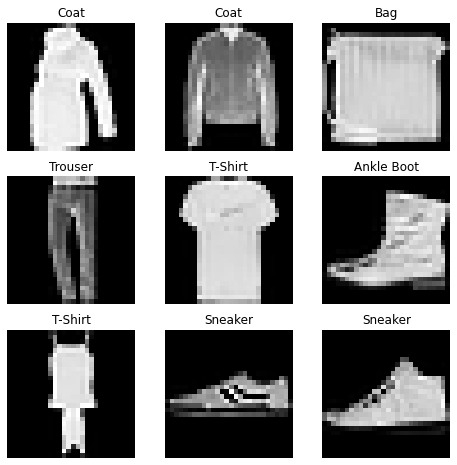

In [7]:
# iterating and visualizing the dataset
# we can index Datasets manually like a list: training_data[index].
# we use matplotlib to visualize some samples in our training data

labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [8]:
# creating a custom dataset for your files
# a custom dataset class must implement three functions: __init__, 
# __len__, and __getitem__. take a look at this implemenetation:
# fashionMNIST images are stored in a directory img_dir and their labels
# are stored separately in a CSV file annotations_file

In [9]:
import os 
import pandas as pd 
from torchvision.io import decode_image 

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir 
        self.transform = transform
        self.target_transform = target_transform
        
    def __len__(self):
        return len(self.img_labels)
    
    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx,0])
        image = decode_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

In [10]:
# __init__
# the __init__ function is run once when instantiating the dataset object
# we initialize the directory containing the images, the annotations file,
# and both transforms 

In [11]:
def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
    self.img_labels = pd.read_csv(annotations_file)
    self.img_dir = img_dir
    self.transform = transform
    self.target_transform = target_transform

In [12]:
# ___len__
# the __len__ function returns the number of samples in our dataset

def __len__(self):
    return len(self.img_labels)

In [13]:
# __getitem__
# the __getitem__ function loads and rturns a sample from the dataset
# at the given index idx. based on the index, it identifies the image's
# location on disk, converts that to a tensor using decode_image, retrieves
# the corresponding label from the csv data in self.img_labels, calls
# the transform functions on them (if applicable) and returns the tensor
# image and corresponding label in a tuple.

In [14]:
def __getitem__(self, idx):
    img_path - os.path.join(self.img_dir, self.img_labels.iloc[idx,0])
    image = decode_image(img_path)
    label = self.img_labels.iloc[idx, 1]
    if self.transform:
        image = self.transform(image)
    if self.target_transform:
        label = self.target_transform(label)
    return image, label

In [15]:
# preparing your data for trainning with dataloaders